# Analysis of student responses

Hello, and welcome to the analysis of student responses. This notebook will guide you through the analysis of the student responses. The analysis is divided into three parts:

> **NOTE**: the code and text for this notebook was mostly genereted by Github Copilot*

# ~~Vetenskapsvidrig behandling av data för att den ska säga det jag vill~~ Preprocessing

Import some nice packages and the data.


In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('data/student_responses.csv', skipinitialspace=True)

df.head()

,Tidstämpel,Which task does this form consider?,What is the level of your group?,Did you find this task engaging?,"OPTIONAL: Comment on the level of engagment (what was the least engaging part, anything you'd change, etc):","How many hours did you spend on this exercise? If more than ten, please leave a comment.","OPTIONAL: Comment on the time consumption (did you find something confusing, were there a lack of examples, etc):",How would you rate the difficulty of this exercise?,"OPTIONAL: Comment on the task difficulty (if something was particularly easy or hard, suggestions etc)",OPTIONAL: Any other feedback that comes in mind that could improve the task:
0,2022-09-08 17.08.27,7,I don't know,1.0,poor test quality,5,It was very reasonab le,3,It was hard to read with all the emoji's,NaN
1,2022-09-09 14.54.35,1,Plus,4.0,NaN,1,"I found the tips a little confusing, and felt ...",1,See prior comment,better explanations
2,2022-09-09 14.54.57,1,Plus,7.0,NaN,2,NaN,1,NaN,NaN
3,2022-09-09 14.55.36,1,Regular,4.0,It felt a little backwards thinking to make a ...,1,"No very easy, took about 15-20 min.",1,"Very easy but good for a first assignment,","No, good first task."
4,2022-09-09 14.55.42,1,"Regular, Plus",3.0,NaN,3,kodskrivandet var inte så svårt men det svåra ...,5,NaN,NaN


For now, I am only interested in numerical responses. I will ignore the free text responses.

In [385]:
df = df.iloc[:,[1,2,3,5,7]]
df.head()

,Which task does this form consider?,What is the level of your group?,Did you find this task engaging?,"How many hours did you spend on this exercise? If more than ten, please leave a comment.",How would you rate the difficulty of this exercise?
0,7,I don't know,1.0,5,3
1,1,Plus,4.0,1,1
2,1,Plus,7.0,2,1
3,1,Regular,4.0,1,1
4,1,"Regular, Plus",3.0,3,5


The Google Form allows for multiple responses, so it is a bit messy to work with. I will need to clean it up a bit.

In [386]:
df.groupby(["Which task does this form consider?", "What is the level of your group?"])["What is the level of your group?"].count()

Which task does this form consider?  What is the level of your group?
1                                    Beginner                            15
                                     Beginner, Regular                    1
                                     I don't know                         1
                                     Plus                                 3
                                     Regular                             30
                                     Regular, Plus                        7
2                                    Beginner                            20
                                     Beginner, Regular                    2
                                     Regular                             64
                                     Regular, I don't know                1
3                                    Beginner                            18
                                     Beginner, Regular                    1
                  

If they respond with two group levels, I will count it as the more advanced. For example, if they respond with "Beginner" and "Regular", I will count it as "Regular". I will also remove "I don't know" responses.


In [387]:
df.replace('Beginner, Regular', 'Regular', inplace=True)
df.replace('Regular, Plus', 'Plus', inplace=True)

df.groupby(["Which task does this form consider?", "What is the level of your group?"]).count()

Did you find this task engaging?  \
Which task does this form consider? What is the level of your group?                                     
1                                   Beginner                                                        15   
                                    I don't know                                                     1   
                                    Plus                                                            10   
                                    Regular                                                         31   
2                                   Beginner                                                        20   
                                    Regular                                                         66   
                                    Regular, I don't know                                            1   
3                                   Beginner                                                        18   
                                    Regular                                                         54   
4                                   Beginner                                                        12   
                                    Regular                                                         42   
5                                   Beginner                                                        26   
                                    Plus                                                            10   
                                    Regular                                                         42   
6                                   Beginner                                                        14   
                                    Plus                                                             1   
                                    Regular                                                         41   
7                                   I don't know                                                     1   
                                    Regular                                                          1   
8                                   Beginner                                                         1   

                                                                      How many hours did you spend on this exercise? If more than ten, please leave a comment.  \
Which task does this form consider? What is the level of your group?                                                                                             
1                                   Beginner                                                                         15                                          
                                    I don't know                                                                      1                                          
                                    Plus                                                                             10                                          
                                    Regular                                                                          31                                          
2                                   Beginner                                                                         20                                          
                                    Regular                                                                          66                                          
                                    Regular, I don't know                                                             1                                          
3                                   Beginner                                                                         18                                          
                                    Regular                                                                          

In [388]:
# Only three responses
df[df['What is the level of your group?'].str.contains('I don\'t know')== True]

,Which task does this form consider?,What is the level of your group?,Did you find this task engaging?,"How many hours did you spend on this exercise? If more than ten, please leave a comment.",How would you rate the difficulty of this exercise?
0,7,I don't know,1.0,5,3
47,1,I don't know,6.0,8,2
265,2,"Regular, I don't know",6.0,5,4


In [389]:
df = df[~df['What is the level of your group?'].str.contains('I don\'t know')]

By the point of writing this, task 7 and 8 are not yet finished. I will remove them from the analysis.

In [390]:
df = df[df["Which task does this form consider?"] != 7]
df = df[df["Which task does this form consider?"] != 8]
df.head()

,Which task does this form consider?,What is the level of your group?,Did you find this task engaging?,"How many hours did you spend on this exercise? If more than ten, please leave a comment.",How would you rate the difficulty of this exercise?
1,1,Plus,4.0,1,1
2,1,Plus,7.0,2,1
3,1,Regular,4.0,1,1
4,1,Plus,3.0,3,5
5,1,Plus,4.0,2,2


Now the data is cleaned up, I can start to analyze it.

In [391]:
df.groupby(["Which task does this form consider?", "What is the level of your group?"])["What is the level of your group?"].count()

Which task does this form consider?  What is the level of your group?
1                                    Beginner                            15
                                     Plus                                10
                                     Regular                             31
2                                    Beginner                            20
                                     Regular                             66
3                                    Beginner                            18
                                     Regular                             54
4                                    Beginner                            12
                                     Regular                             42
5                                    Beginner                            26
                                     Plus                                11
                                     Regular                             42
6                 

# Analysis

In [392]:
df.head()

,Which task does this form consider?,What is the level of your group?,Did you find this task engaging?,"How many hours did you spend on this exercise? If more than ten, please leave a comment.",How would you rate the difficulty of this exercise?
1,1,Plus,4.0,1,1
2,1,Plus,7.0,2,1
3,1,Regular,4.0,1,1
4,1,Plus,3.0,3,5
5,1,Plus,4.0,2,2


<AxesSubplot:xlabel='Engagement', ylabel='Count'>

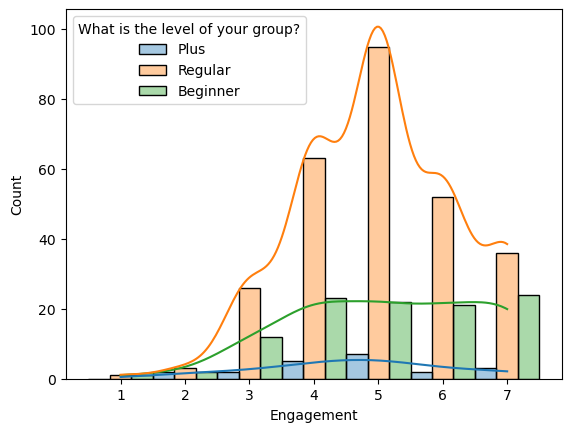

In [393]:
df.rename(columns={"Did you find this task engaging?": "Engagement"}, inplace=True)
sns.histplot(data=df, x="Engagement", hue="What is the level of your group?", alpha=0.4, discrete=True, multiple="dodge", kde = True)


<AxesSubplot:xlabel='Hours', ylabel='Count'>

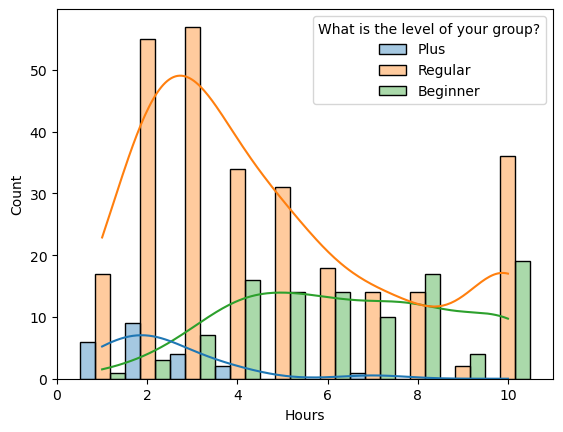

In [394]:
df.rename(columns={"How many hours did you spend on this exercise? If more than ten, please leave a comment.": "Hours"}, inplace=True)
sns.histplot(data=df, x="Hours", hue="What is the level of your group?", alpha=0.4, discrete=True, multiple="dodge", kde = True)

<AxesSubplot:xlabel='Difficulty', ylabel='Count'>

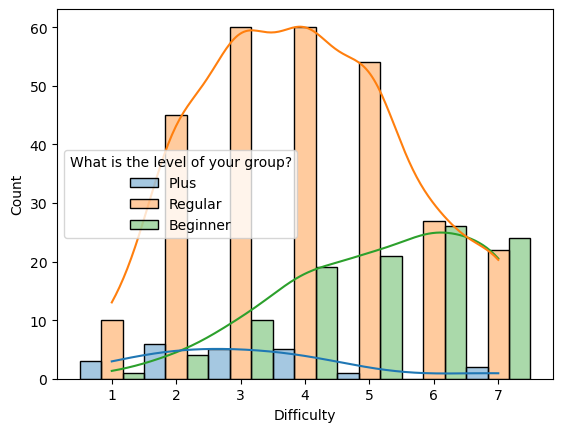

In [395]:
# OBSERVE THE DOUBLE WHITE SPACES >:(
df.rename(columns={"How  would you rate the difficulty of this exercise?": "Difficulty"}, inplace=True)
sns.histplot(data=df, x="Difficulty", hue="What is the level of your group?", alpha=0.4, discrete=True, multiple="dodge", kde = True)


Let's also plot them for each task.

> **NOTE:** The legends are not the same color for all plots. It is quite misleading, but I will fix this later.

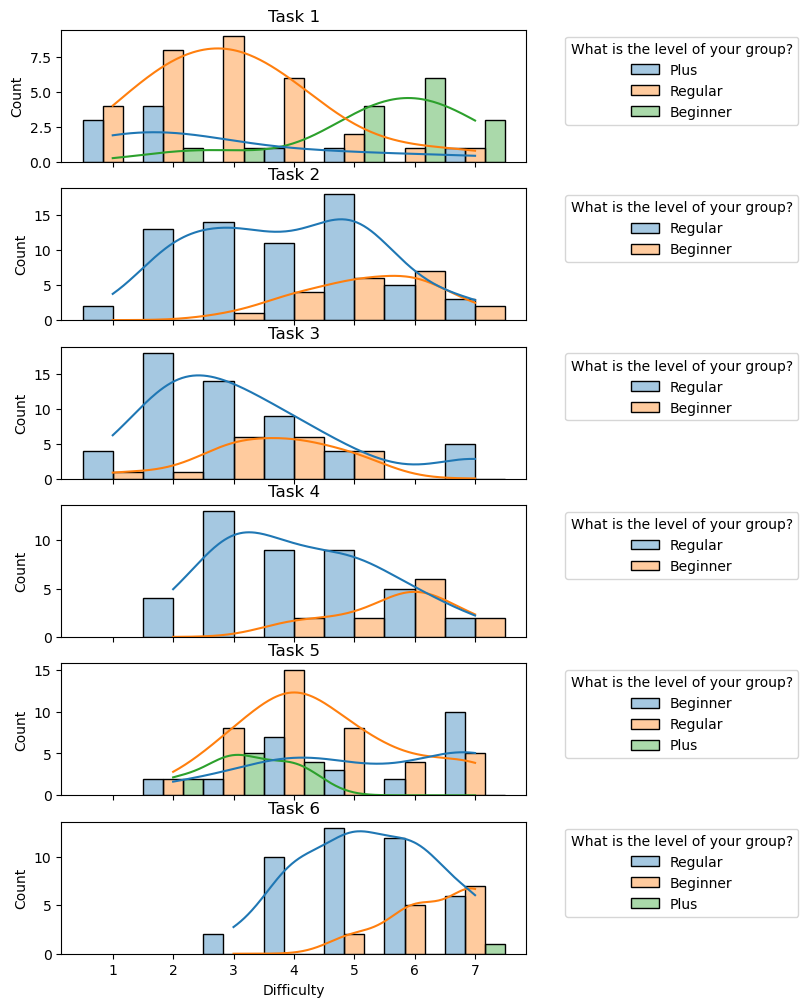

In [464]:
fig, axes = plt.subplots(6, 1, figsize=(6, 12), sharex=True)



for col, task in enumerate(sorted(df["Which task does this form consider?"].unique())):
    g = sns.histplot(
        data = df[df["Which task does this form consider?"] == int(task)],
        x="Difficulty", 
        hue="What is the level of your group?", 
        alpha=0.4, 
        discrete=True, 
        multiple="dodge", 
        kde = True,
        ax = axes[task-1],
        legend=True,
        )
    g.set_title("Task " + str(task))
    sns.move_legend(g, loc='upper right', bbox_to_anchor=(1.6, 1.0), ncol=1)
        

#plt.tight_layout()

In [406]:
# TODO refactor all column names :9
df["Which task does this form consider?"].unique()
type(df["Which task does this form consider?"].unique().sort(axis=0))

NoneType